In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 200s 1us/step


In [5]:
print(f'shape of train data: {x_train.shape, y_train.shape}, shape of test data: {x_test.shape, y_test.shape}')

shape of train data: ((50000, 32, 32, 3), (50000, 1)), shape of test data: ((10000, 32, 32, 3), (10000, 1))


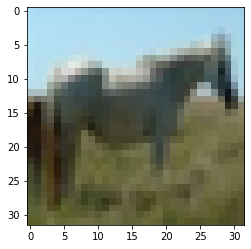

In [9]:
plt.imshow(x_train[22222])

In [10]:
pd.DataFrame(y_train).value_counts()/(y_train.shape[0])

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
dtype: float64

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
#Scaling
x_train = x_train/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [16]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape=(32,32,3), activation='relu'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [17]:
cnn.add(MaxPool2D((2,2)))

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [19]:
cnn.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D((2,2)))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
Total params: 1,392
Trainable params: 1,392
Non-trainable params: 0
_________________________________________________________________


In [20]:
cnn.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D((2,2)))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)        

In [21]:
cnn.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D((2,2)))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)        

In [22]:
cnn.add(Flatten())
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)        

In [23]:
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)        

In [24]:
cnn.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [25]:
cnn.fit(x_train,y_train,epochs=10,batch_size=500,validation_split=0.1)

Epoch 1/10
90/90 [==============================] - 22s 212ms/step - loss: 2.0092 - accuracy: 0.2571 - val_loss: 1.7409 - val_accuracy: 0.3692
Epoch 2/10
90/90 [==============================] - 17s 189ms/step - loss: 1.6438 - accuracy: 0.4067 - val_loss: 1.5704 - val_accuracy: 0.4334
Epoch 3/10
90/90 [==============================] - 17s 188ms/step - loss: 1.5046 - accuracy: 0.4590 - val_loss: 1.4561 - val_accuracy: 0.4656
Epoch 4/10
90/90 [==============================] - 17s 191ms/step - loss: 1.4080 - accuracy: 0.4924 - val_loss: 1.3845 - val_accuracy: 0.4906
Epoch 5/10
90/90 [==============================] - 17s 191ms/step - loss: 1.3478 - accuracy: 0.5161 - val_loss: 1.3272 - val_accuracy: 0.5182
Epoch 6/10
90/90 [==============================] - 17s 191ms/step - loss: 1.2899 - accuracy: 0.5367 - val_loss: 1.2795 - val_accuracy: 0.5378
Epoch 7/10
90/90 [==============================] - 17s 193ms/step - loss: 1.2321 - accuracy: 0.5570 - val_loss: 1.2319 - val_accuracy: 0.5624

In [28]:
xt = x_test[155].reshape(1,32,32,3)
cnn.predict(xt)

1/1 [==============================] - 0s 142ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [30]:
classes[np.argmax(cnn.predict(xt))]

1/1 [==============================] - 0s 39ms/step


'dog'

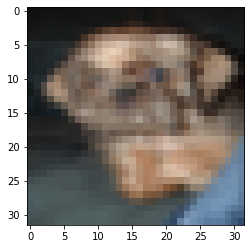

In [31]:
plt.imshow(x_test[155])

In [32]:
cnn.save('cifarmodel.h5')

In [33]:
from tensorflow import keras
model = keras.models.load_model('cifarmodel.h5')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)        

In [36]:
model.predict(x_test[5].reshape(1,32,32,3))

1/1 [==============================] - 0s 159ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [37]:
classes[np.argmax(model.predict(x_test[5].reshape(1,32,32,3)))]

1/1 [==============================] - 0s 29ms/step


'dog'

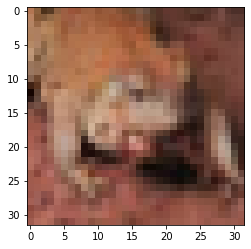

In [38]:
plt.imshow(x_test[5])